In [3]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries.csv")

In [5]:
data.drop(data.filter(regex= "coverage|numerator|denominator|suspected|reported").columns, axis= 1, inplace = True)

In [6]:
orden = data.sort_values(by = "date", ascending = True)

In [7]:
orden.reset_index(inplace = True, drop = True)
orden


,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,hospital_onset_covid,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown,staffed_icu_pediatric_patients_confirmed_covid,staffed_pediatric_icu_bed_occupancy,total_staffed_pediatric_icu_beds
0,MN,2020/01/01,0,0,0,0,0.0,46.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IN,2020/01/01,0,0,0,0,0.0,30.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PR,2020/01/01,0,0,0,0,0.0,146.0,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LA,2020/01/01,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC,2020/01/01,0,0,0,0,0.0,72.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47796,NY,2022/08/08,2,156,7,151,396.0,41200.0,31595.0,2729.0,...,0.0,1347.0,2204.0,10.0,4.0,0.0,4.0,14.0,304.0,455.0
47797,DE,2022/08/08,2,6,4,5,13.0,2561.0,2058.0,223.0,...,0.0,182.0,245.0,1.0,1.0,0.0,0.0,1.0,60.0,76.0
47798,AK,2022/08/08,1,20,2,19,3.0,1806.0,1411.0,73.0,...,0.0,111.0,193.0,1.0,0.0,0.0,0.0,0.0,9.0,9.0
47799,KS,2022/08/08,7,108,20,96,1.0,6705.0,3924.0,238.0,...,0.0,94.0,211.0,0.0,0.0,0.0,0.0,2.0,19.0,44.0


In [8]:
df = orden

In [9]:
df

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,hospital_onset_covid,inpatient_beds,inpatient_beds_used,inpatient_beds_used_covid,...,total_patients_hospitalized_confirmed_influenza_and_covid,all_pediatric_inpatient_bed_occupied,all_pediatric_inpatient_beds,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_unknown,staffed_icu_pediatric_patients_confirmed_covid,staffed_pediatric_icu_bed_occupancy,total_staffed_pediatric_icu_beds
0,MN,2020/01/01,0,0,0,0,0.0,46.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IN,2020/01/01,0,0,0,0,0.0,30.0,15.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,PR,2020/01/01,0,0,0,0,0.0,146.0,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LA,2020/01/01,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NC,2020/01/01,0,0,0,0,0.0,72.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47796,NY,2022/08/08,2,156,7,151,396.0,41200.0,31595.0,2729.0,...,0.0,1347.0,2204.0,10.0,4.0,0.0,4.0,14.0,304.0,455.0
47797,DE,2022/08/08,2,6,4,5,13.0,2561.0,2058.0,223.0,...,0.0,182.0,245.0,1.0,1.0,0.0,0.0,1.0,60.0,76.0
47798,AK,2022/08/08,1,20,2,19,3.0,1806.0,1411.0,73.0,...,0.0,111.0,193.0,1.0,0.0,0.0,0.0,0.0,9.0,9.0
47799,KS,2022/08/08,7,108,20,96,1.0,6705.0,3924.0,238.0,...,0.0,94.0,211.0,0.0,0.0,0.0,0.0,2.0,19.0,44.0


**1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?**

Columnas a usar:

**inpatient_beds_used_covid** (Pacientes informados actualmente hospitalizados en una cama para pacientes hospitalizados que tienen sospecha o confirmación de COVID-19 en este estado)

**hospital_onset_covid** (Total de pacientes hospitalizados actuales con inicio de COVID-19 sospechoso o confirmado por laboratorio catorce o más días después de la admisión por una afección distinta de COVID-19 en este estado.)

**previous_day_admission_adult_covid_confirmed**(Número de pacientes que fueron admitidos en una cama de hospitalización para adultos el día calendario anterior que tenían COVID-19 confirmado al momento de la admisión en este estado)

**previous_day_admission_pediatric_covid_confirmed**(Número de pacientes pediátricos que fueron admitidos en una cama para pacientes hospitalizados, incluidos NICU, PICU, recién nacidos y salas de recién nacidos, en el día calendario anterior que habían confirmado COVID-19 al momento de la admisión en este estado)

In [10]:
#Primeros 6 meses del 2020
df["date"] = pd.to_datetime(df["date"], errors = "coerce")
extraido = df.set_index("date")
grupo = extraido.loc["2020/01/01":"2020/06/30"]
grupo.reset_index(inplace = True)

In [11]:
nan = grupo.dropna(how = "all",axis=1)
df1 = nan.fillna(0)

In [12]:
var = df1.groupby(['state']).agg('sum').reset_index()
api = var[["state","inpatient_beds_used_covid", 
    "hospital_onset_covid",
    "previous_day_admission_adult_covid_confirmed",
    "previous_day_admission_pediatric_covid_confirmed"]]

In [13]:
muestra = api.sort_values(by = "inpatient_beds_used_covid", ascending= False)
resp1 = muestra.head(5)
resp1

,state,inpatient_beds_used_covid,hospital_onset_covid,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed
34,NY,686528.0,5569.0,14.0,0.0
4,CA,434721.0,5499.0,0.0,0.0
9,FL,322227.0,6411.0,0.0,0.0
44,TX,246237.0,7703.0,0.0,0.0
14,IL,214010.0,1498.0,0.0,0.0


En la tabla se puede mostrar que la ocupación hospitalaria por parte de adultos es mayor a comparación de los pediatricos que es casi nulo. Denotando que el contagio de esta enfermedad tiene que ver con el historico de salud, mayores años, mayor probailidad de contagio.

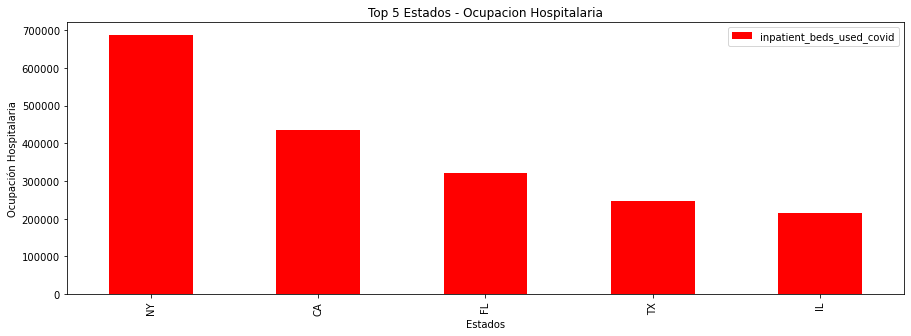

In [14]:
resp1.plot(kind = "bar", x="state",y="inpatient_beds_used_covid", color = "red")
plt.title("Top 5 Estados - Ocupacion Hospitalaria")
plt.ylabel("Ocupación Hospitalaria")
plt.xlabel("Estados")
plt.gcf().set_size_inches(15,5)
# show the plot
plt.show()

**2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:**

**Intervalos de crecimiento y decrecimiento**

**Puntos críticos (mínimos y máximos)**

*SE TOMARA LAS FECHAS DE INICIO Y LEVANTAMIENTO DE PANDEMIA EN EL ESTADO: 01/03/2020 AL 14/06/2021.

Inicio: https://es.wikipedia.org/wiki/Pandemia_de_COVID-19_en_la_ciudad_de_Nueva_York

Fin : https://elpais.com/sociedad/2021-06-15/nueva-york-celebra-el-fin-de-la-pandemia-al-levantar-las-ultimas-restricciones-vigentes.html

In [15]:
df["date"] = pd.to_datetime(df["date"], errors = "coerce")
ny = df.set_index("date")
pandemia = ny.loc["2020/03/01":"2021/06/14"]
pandemia.reset_index(inplace = True)

In [16]:
#COLUMNAS A ANALIZAR
only_ny = pandemia[pandemia.state.eq("NY")]
ap= only_ny[["date","state","inpatient_beds_used_covid",
"previous_day_admission_adult_covid_confirmed",
"previous_day_admission_pediatric_covid_confirmed",
"total_adult_patients_hospitalized_confirmed_covid",
"total_pediatric_patients_hospitalized_confirmed_covid",
"previous_day_admission_adult_covid_confirmed_18-19",
"previous_day_admission_adult_covid_confirmed_20-29",
"previous_day_admission_adult_covid_confirmed_30-39",
"previous_day_admission_adult_covid_confirmed_40-49",
"previous_day_admission_adult_covid_confirmed_50-59",
"previous_day_admission_adult_covid_confirmed_60-69",
"previous_day_admission_adult_covid_confirmed_70-79",
"previous_day_admission_adult_covid_confirmed_80+",
"previous_day_admission_adult_covid_confirmed_unknown",
"staffed_icu_pediatric_patients_confirmed_covid"]]

In [17]:
val1 = ap["date"].dt.year
val2 = ap["date"].dt.month
ap.insert(loc=1, column= "Year", value = val1)
ap.insert(loc=2, column= "Month", value = val2)
rango = ap.fillna(0)

In [18]:
ocupacion = rango.groupby(by = ["Year","Month"]).agg("sum").reset_index()
ocupacion

,Year,Month,inpatient_beds_used_covid,previous_day_admission_adult_covid_confirmed,previous_day_admission_pediatric_covid_confirmed,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_unknown,staffed_icu_pediatric_patients_confirmed_covid
0,2020,3,23735.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,4,373597.0,2.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2020,5,199059.0,8.0,0.0,36.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,6,90137.0,4.0,0.0,46.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2020,7,50577.0,1179.0,47.0,10323.0,377.0,5.0,57.0,79.0,59.0,97.0,98.0,106.0,157.0,67.0,38.0
5,2020,8,50996.0,2617.0,28.0,17456.0,746.0,20.0,184.0,190.0,193.0,285.0,338.0,356.0,394.0,614.0,114.0
6,2020,9,40745.0,2729.0,87.0,15538.0,455.0,14.0,165.0,195.0,173.0,311.0,434.0,496.0,481.0,334.0,52.0
7,2020,10,54572.0,4168.0,173.0,29791.0,731.0,30.0,289.0,306.0,359.0,519.0,812.0,807.0,770.0,242.0,142.0
8,2020,11,93219.0,12030.0,167.0,69029.0,926.0,40.0,451.0,601.0,835.0,1573.0,2007.0,2182.0,2021.0,2328.0,9.0
9,2020,12,219852.0,26846.0,275.0,190368.0,1580.0,60.0,781.0,1281.0,1690.0,3651.0,5370.0,5624.0,5868.0,2519.0,0.0


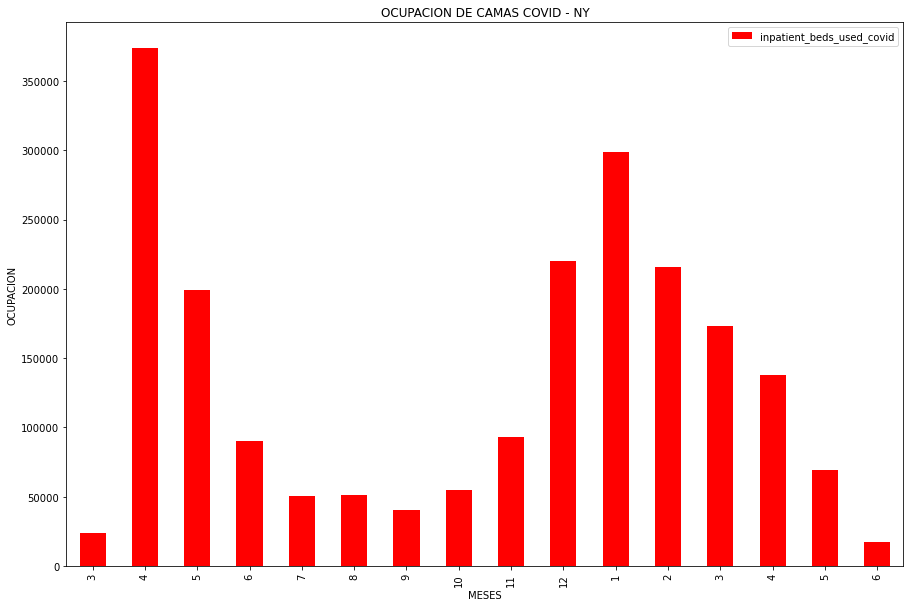

In [19]:
ocupacion.plot(kind = "bar", x="Month",y= "inpatient_beds_used_covid", color = "red")
plt.title("OCUPACION DE CAMAS COVID - NY")
plt.ylabel("OCUPACION")
plt.xlabel("MESES")
plt.gcf().set_size_inches(15,10)
# show the plot
plt.show()

Como se puede ver en la grafica para el año 2020:

1. Meses de crecimiento: abril a mayo y noviembre a diciembre.
2. Meses de decrecimiento: junio a octubre.
3. Punto minimo: marzo - 23735
4. Punto máximo: abril - 373597

Como se puede ver en la grafica para el año 2021 (hasta el mes de junio):
1. Meses de crecimiento: enero a marzo
2. Meses de decrecimiento: abril a junio
3. Punto minimo: junio - 17364
4. Punto máximo: enero - 298495

**3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.**

In [20]:
df["date"] = pd.to_datetime(df["date"], errors = "coerce")
uci = df.set_index("date")
estados_uci = uci.loc["2020/01/01":"2020/12/31"]
estados_uci.reset_index(inplace = True)

In [21]:
suma = estados_uci.groupby(by = ["state"]).agg("sum")

In [22]:
#COLUMNAS A UTILIZAR:
valores = suma[["staffed_icu_adult_patients_confirmed_covid", 
                "total_staffed_adult_icu_beds", 
                "staffed_pediatric_icu_bed_occupancy"]]

In [23]:
valores["Total"] = valores.sum(axis=1)

C:\Users\GABRIELA\AppData\Local\Temp/ipykernel_9016/2545793227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores["Total"] = valores.sum(axis=1)


In [24]:
ori= valores.sort_values(by= "Total", ascending= False).reset_index()
cinco = ori.head(5)
cinco

,state,staffed_icu_adult_patients_confirmed_covid,total_staffed_adult_icu_beds,staffed_pediatric_icu_bed_occupancy,Total
0,CA,260865.0,1228347.0,221557.0,1710769.0
1,TX,335836.0,1186925.0,55836.0,1578597.0
2,FL,175859.0,1025251.0,96279.0,1297389.0
3,NY,61593.0,856642.0,137917.0,1056152.0
4,OH,89483.0,650024.0,71701.0,811208.0


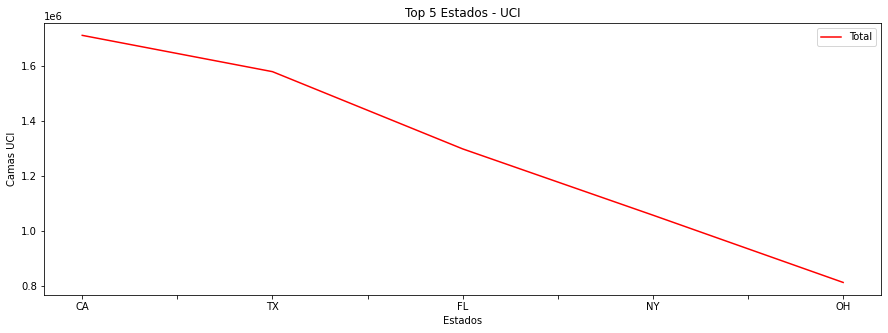

In [25]:
cinco.plot(kind = "line", x="state",y="Total", color = "red")
plt.title("Top 5 Estados - UCI")
plt.ylabel("Camas UCI")
plt.xlabel("Estados")
plt.gcf().set_size_inches(15,5)
# show the plot
plt.show()

**4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?**

In [26]:
va1 = suma[["staffed_icu_pediatric_patients_confirmed_covid"]]
pediatricos = va1.reset_index()
pediatricos

,state,staffed_icu_pediatric_patients_confirmed_covid
0,AK,38.0
1,AL,39.0
2,AR,406.0
3,AZ,625.0
4,CA,989.0
5,CO,191.0
6,CT,11.0
7,DC,245.0
8,DE,2.0
9,FL,284.0


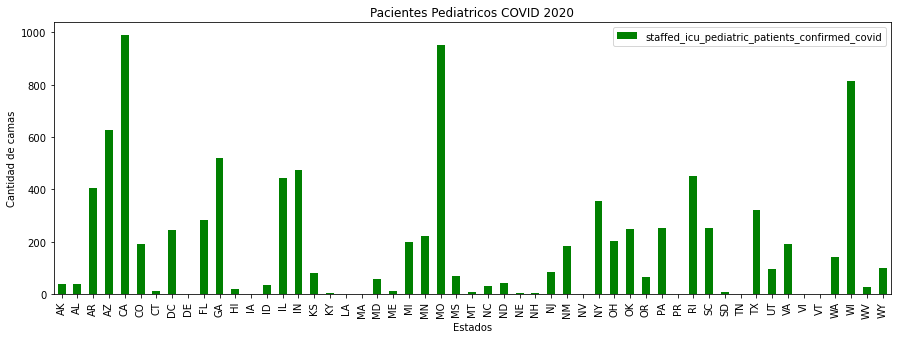

In [27]:
pediatricos.plot(kind = "bar", x="state",y="staffed_icu_pediatric_patients_confirmed_covid", color = "green")
plt.title("Pacientes Pediatricos COVID 2020")
plt.ylabel("Cantidad de camas")
plt.xlabel("Estados")
plt.gcf().set_size_inches(15,5)
# show the plot
plt.show()

**5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.**

**adult_icu_bed_covid_utilization** Porcentaje del total de camas de UCI para adultos con personal actualmente utilizadas por pacientes con sospecha o confirmación de COVID-19 en este estado. Este número solo representa los hospitales en el estado que informan los campos "staffed_icu_adult_patients_confirmed_and_suspected_covid" y "total_staffed_adult_icu_beds".

In [28]:
porcentaje = df[["state", "adult_icu_bed_covid_utilization"]]
uci = porcentaje.fillna(0).groupby(by = ["state"]).agg("sum").reset_index()
uci

,state,adult_icu_bed_covid_utilization
0,AK,90.684614
1,AL,147.355351
2,AR,151.503331
3,AS,0.285714
4,AZ,131.925948
5,CA,127.165544
6,CO,117.809156
7,CT,63.302570
8,DC,74.505393
9,DE,97.917832


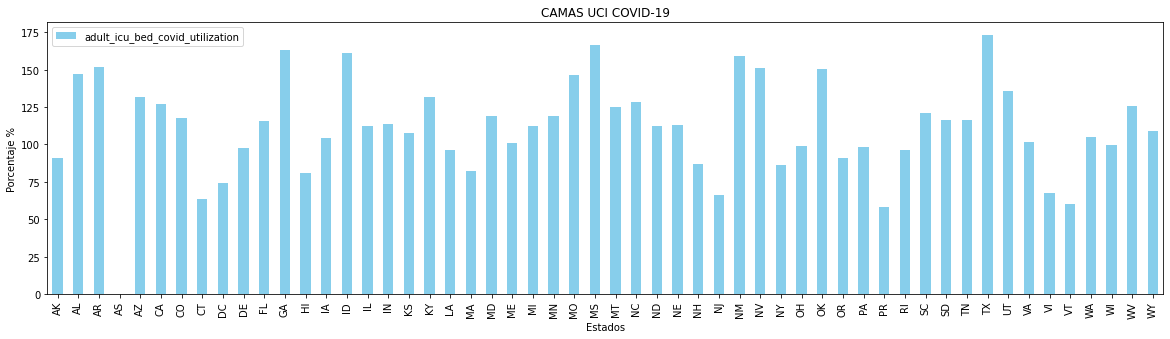

In [29]:
uci.plot(kind = "bar", x="state",y="adult_icu_bed_covid_utilization", color = "skyblue")
plt.title("CAMAS UCI COVID-19")
plt.ylabel("Porcentaje %")
plt.xlabel("Estados")
plt.gcf().set_size_inches(20,5)
# show the plot
plt.show()

**6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?**

In [30]:
df["date"] = pd.to_datetime(df["date"], errors = "coerce")
cov = df.set_index("date")
muertes = cov.loc["2021/01/01":"2021/12/31"]
muertes.reset_index(inplace = True)

In [31]:
covid_muerte = muertes[["state","deaths_covid"]]

In [38]:
resp6 = covid_muerte.groupby(by = ["state"]).agg("sum").reset_index()
resp6.sort_values("deaths_covid",ascending=False)

,state,deaths_covid
5,CA,35108.0
45,TX,32889.0
10,FL,26004.0
35,NY,17620.0
4,AZ,16250.0
39,PA,13363.0
11,GA,12338.0
36,OH,12023.0
28,NC,10922.0
44,TN,9439.0


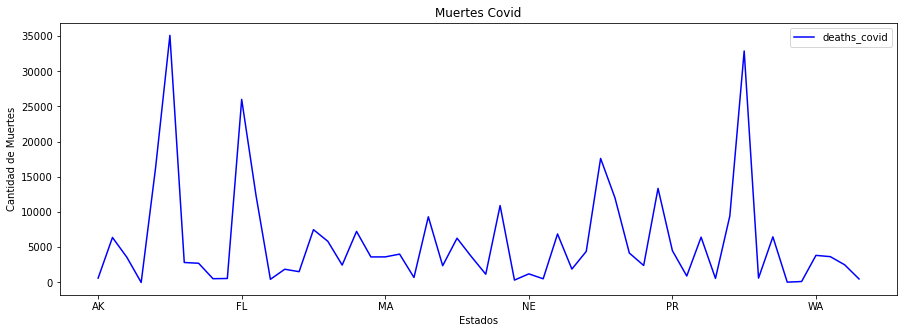

In [33]:
resp6.plot(kind = "line", x="state",y="deaths_covid", color = "blue")
plt.title("Muertes Covid")
plt.ylabel("Cantidad de Muertes")
plt.xlabel("Estados")
plt.gcf().set_size_inches(15,5)
# show the plot
plt.show()

**7 -  ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?**

Columna a usar: **critical_staffing_shortage_today_yes** (Número de hospitales que informan una escasez crítica de personal hoy en día en este estado.)

In [34]:
df["date"] = pd.to_datetime(df["date"], errors = "coerce")
cov = df.set_index("date")
muertes = cov.loc["2021/01/01":"2021/12/31"]
muertes.reset_index(inplace = True)

In [35]:
personal = muertes[["critical_staffing_shortage_today_yes","deaths_covid"]].agg("sum")
personal

critical_staffing_shortage_today_yes    296206.0
deaths_covid                            317015.0
dtype: float64

**8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.**

In [36]:
df2 = df[["date",
        "inpatient_beds_used_covid", 
        "total_staffed_adult_icu_beds", 
        "staffed_icu_pediatric_patients_confirmed_covid",
        "critical_staffing_shortage_today_yes",
        "deaths_covid", ]]

valor1 = df2["date"].dt.year
valor2= df2["date"].dt.month
df2.insert(loc=1, column= "Año", value = valor1)
df2.insert(loc=2, column= "Mes", value = valor2)
resp8 = df2.fillna(0)

In [37]:
ocho = resp8.groupby(by = ["Año","Mes"]).agg("sum").reset_index()
peor = ocho.sort_values(by = ["Año","inpatient_beds_used_covid", "deaths_covid"], ascending=[True,False,False])
peor.head(5)

,Año,Mes,inpatient_beds_used_covid,total_staffed_adult_icu_beds,staffed_icu_pediatric_patients_confirmed_covid,critical_staffing_shortage_today_yes,deaths_covid
11,2020,12,3701968.0,2760229.0,33.0,37425,56674.0
10,2020,11,2421980.0,2628503.0,78.0,32499,33435.0
6,2020,7,2036910.0,890682.0,2649.0,10028,19178.0
7,2020,8,1684254.0,2335213.0,2863.0,24210,31259.0
4,2020,5,1576600.0,3662.0,0.0,6,54884.0


El peor mes de pandemia para Usa fue en diciembre del 2020, donde mayor uso de camas por casas covid y mayor cantidad de muertes.

**9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?**

La mayoría de paises no estaban preparados a nivel sanitario para la pandemia. Muchos de ellos se negaron en declarar cuarentena para no desacelerar la economia como el caso de Estados Unidos. Por lo tanto no se dimensionó respecto a recursos o cantidad de hospitales para casos confirmados que crecian con el tiempo. 
En base a lo aprendido recomendaria planificación y uso de tecnologias de predicción a cualquier sector no sólo salud.